# Surface curvature measurements using vedo in napari
The [vedo library](https://vedo.embl.es/) offers a set of measurements to describe the curvature of surfaces. This notebook shows how to use them on surface data in napari.

See also
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo
from napari_process_points_and_surfaces import \
    add_curvature,\
    Curvature, \
    spherefitted_curvature

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded


We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

In [3]:
shape = vedo.shapes.Ellipsoid()
surface_data = (shape.points(), np.asarray(shape.faces()))
surface_layer = viewer.add_surface(surface_data)

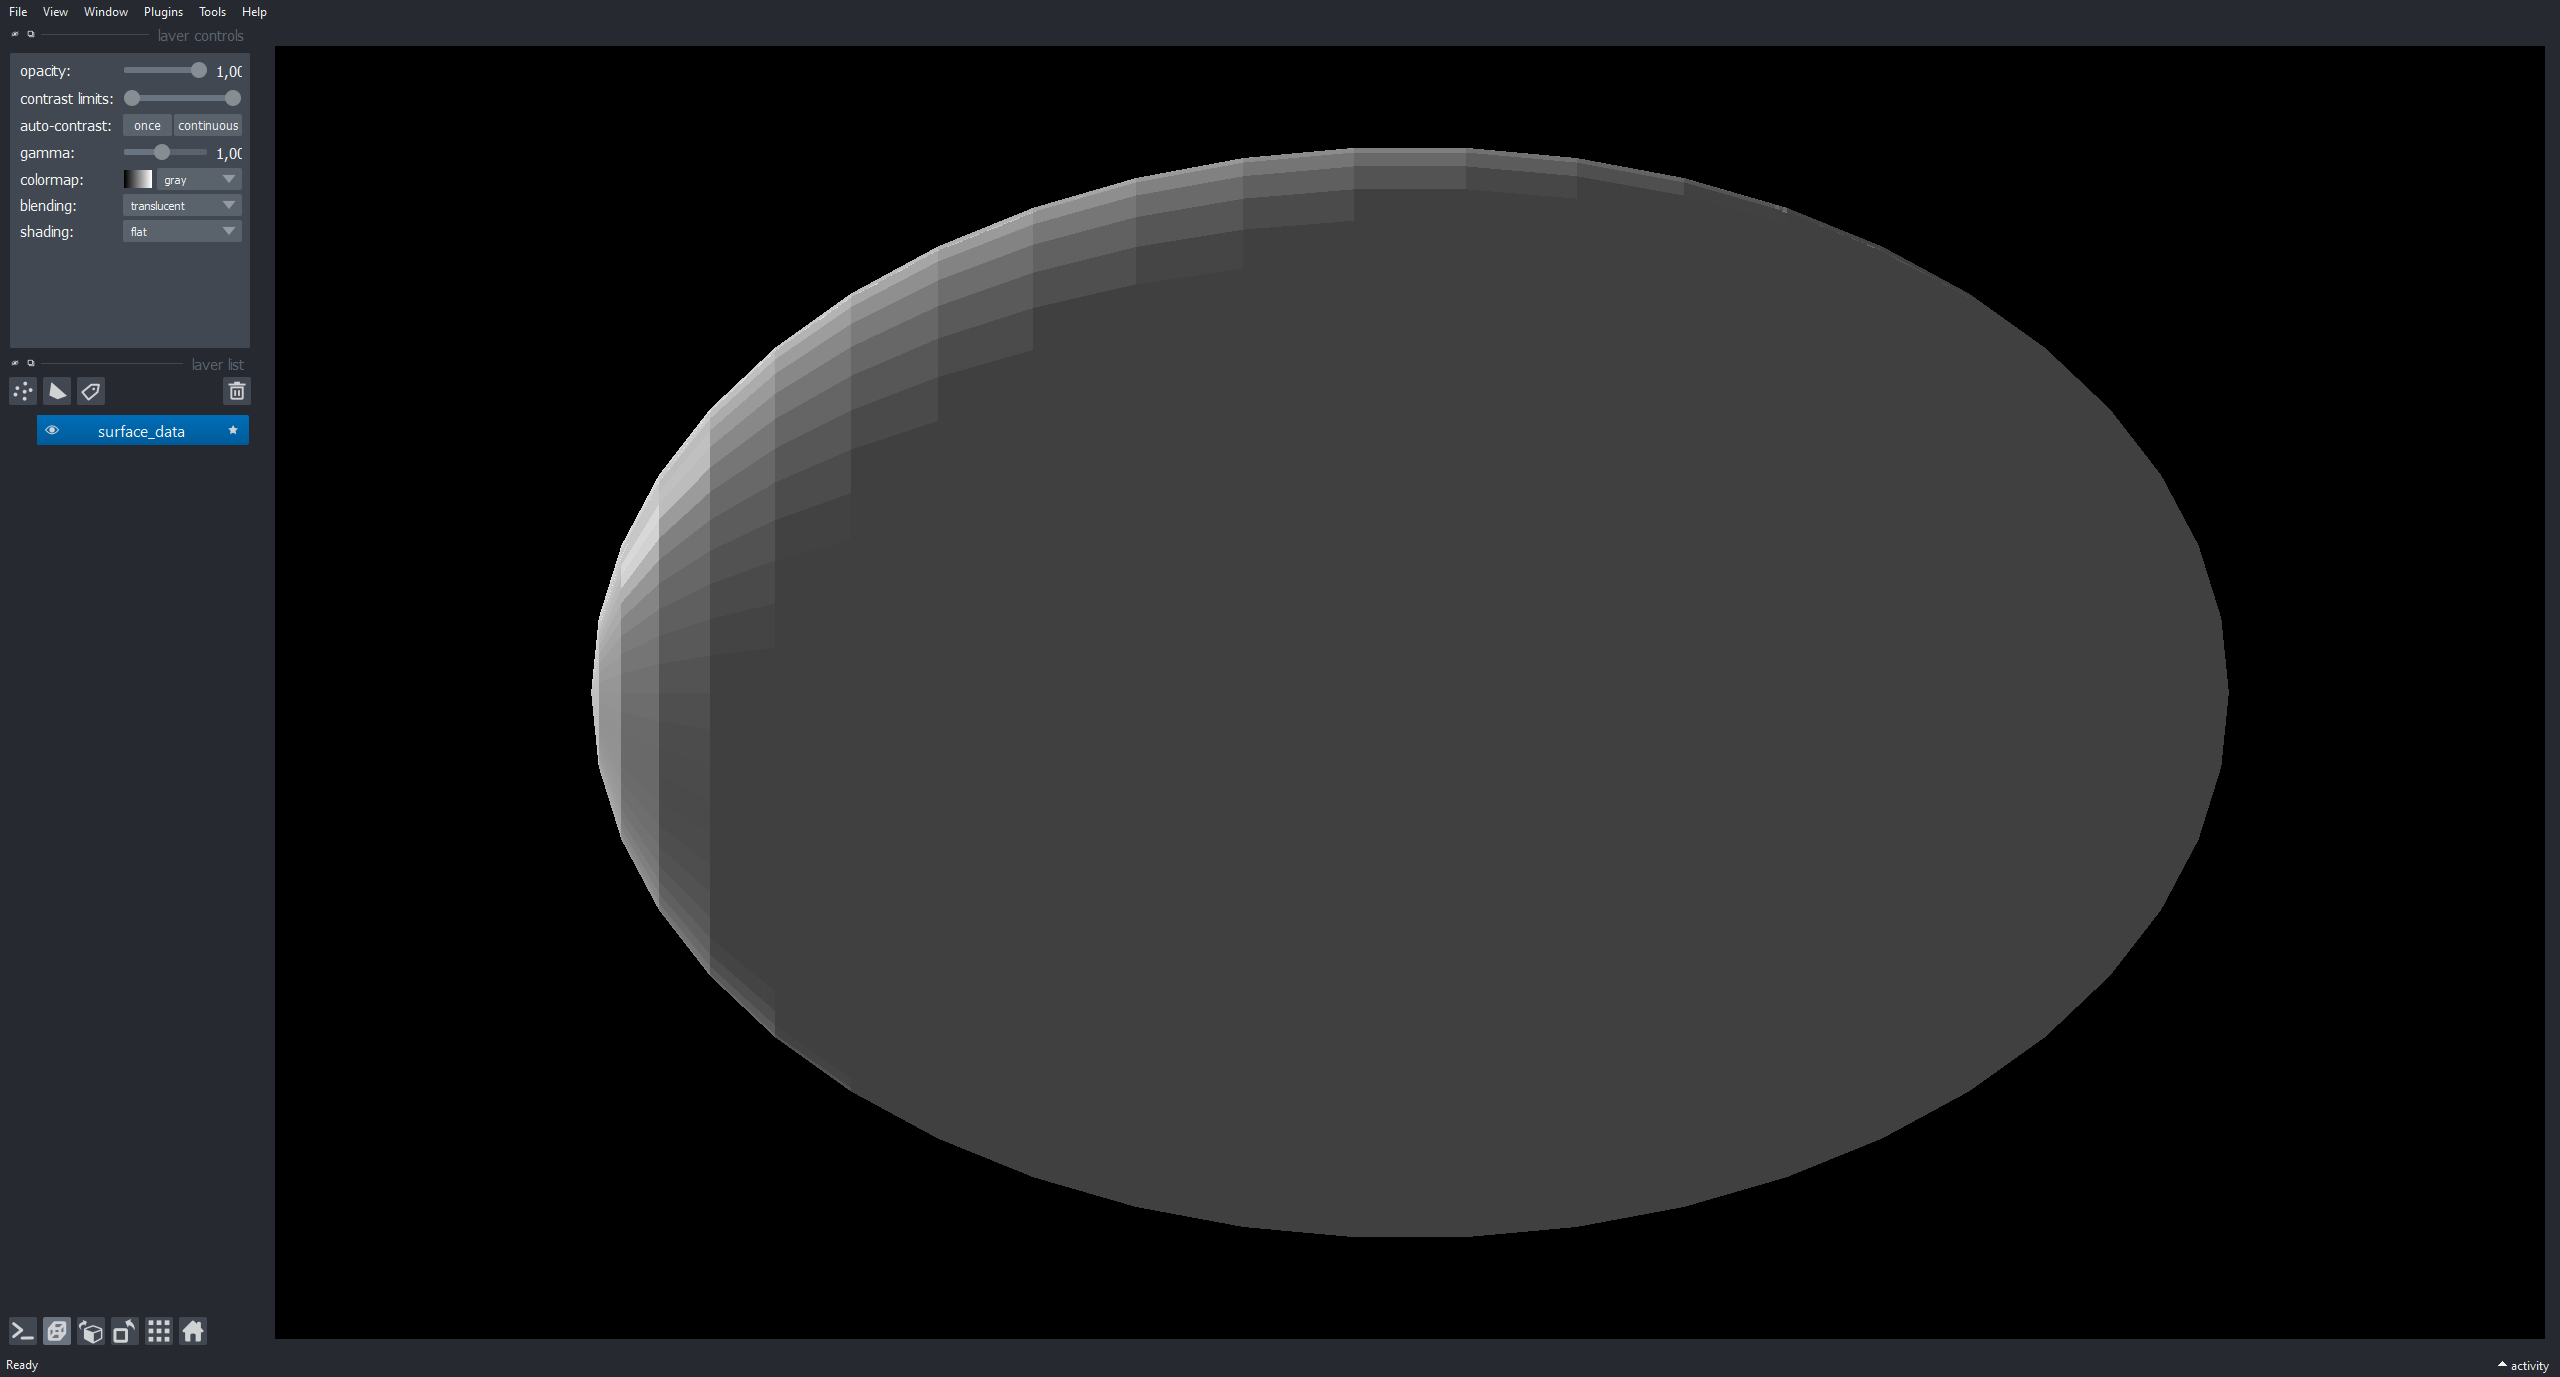

In [4]:
napari.utils.nbscreenshot(viewer, canvas_only=False)

We use `add_curvature()` to calculate the local curvature. Note that this method is highly dependent on the *local vertex structure*. In other words, it is sensitive to the local curvature, not necessarily the overall shape of an object. Available methods to determine curvature are `Curvature.Gauss_Curvature`, `Curvature.Mean_Curvature`, `Curvature.Maximum_Curvature` and `Curvature.Minimum_Curvature`.

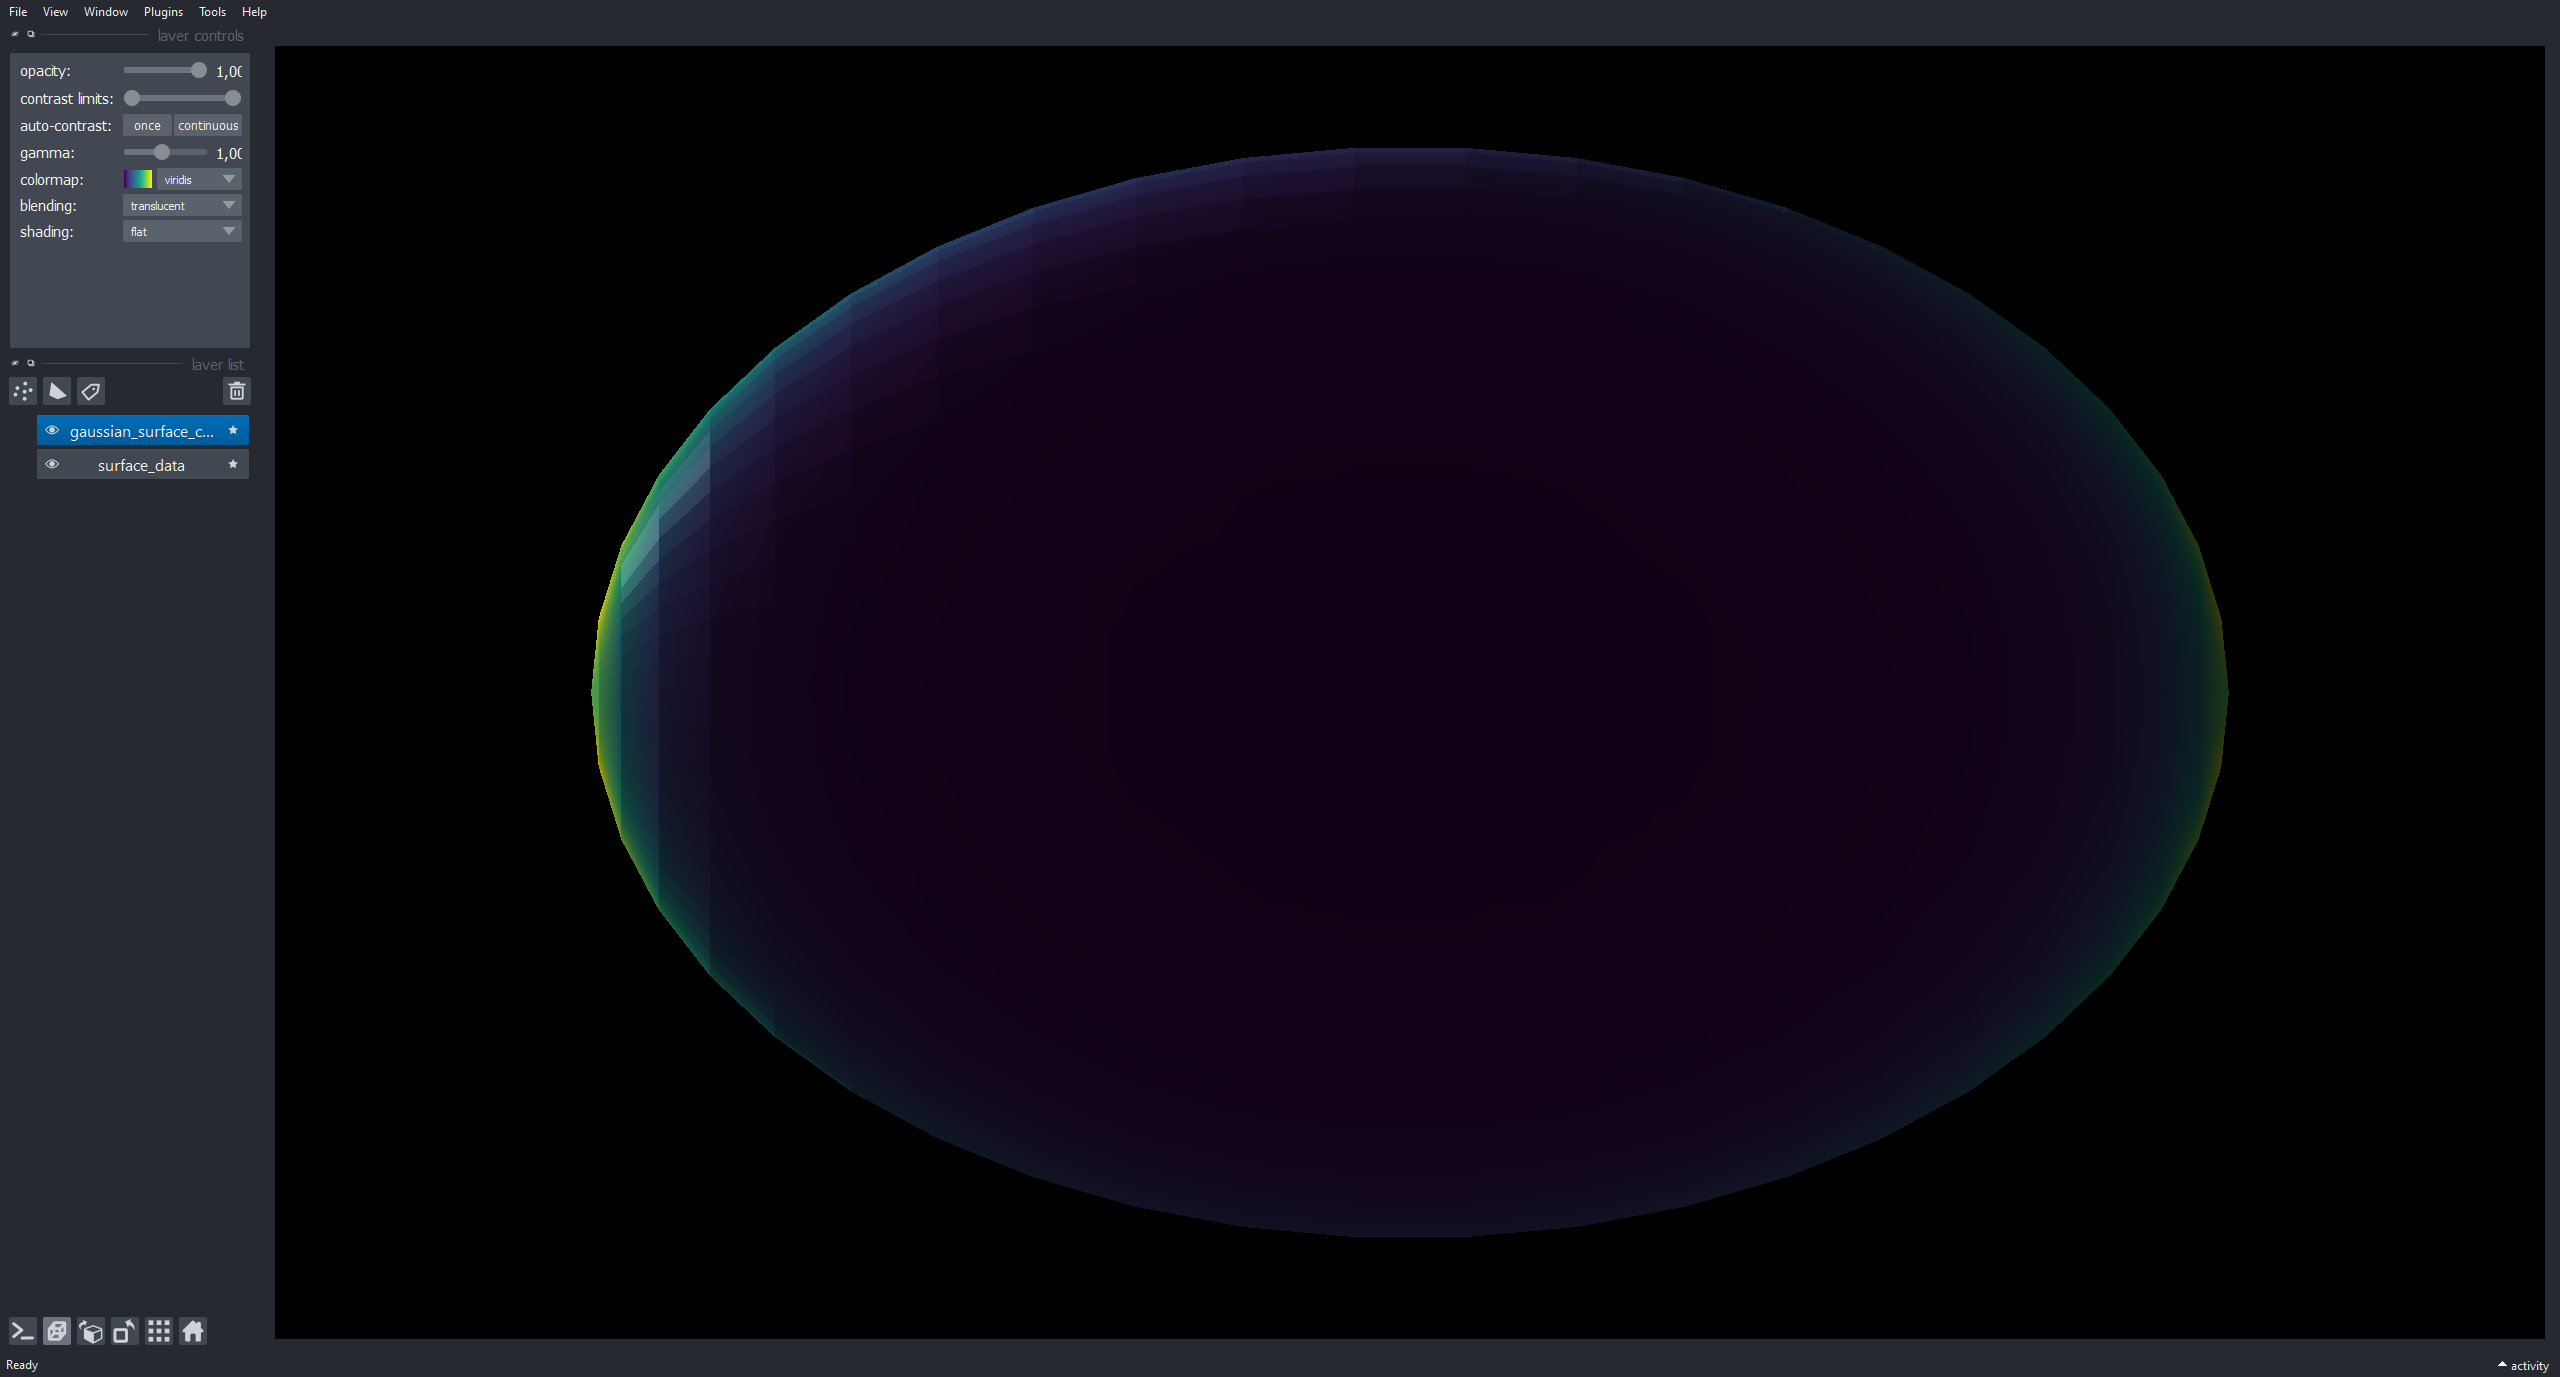

In [5]:
gaussian_surface_curvature = add_curvature(surface_layer.data, curvature_id=Curvature.Gauss_Curvature)
viewer.add_surface(gaussian_surface_curvature, colormap='viridis')
napari.utils.nbscreenshot(viewer, canvas_only=False)

We can use the `spherfit_curvature()`-algorithm to determine the curvature and specifiy the range within which points should be taken into account for the calculation. For this, a sphere is fitted to all points in the neighborhood of a given point. Since the curvature of a sphere is defined as $\frac{1}{r^2}$ ([see here](https://en.wikipedia.org/wiki/Gaussian_curvature)), this can be used as an approximation for the local curvature. This procedure returns two surfaces, which enode the curvature itself and the residues of the fit.

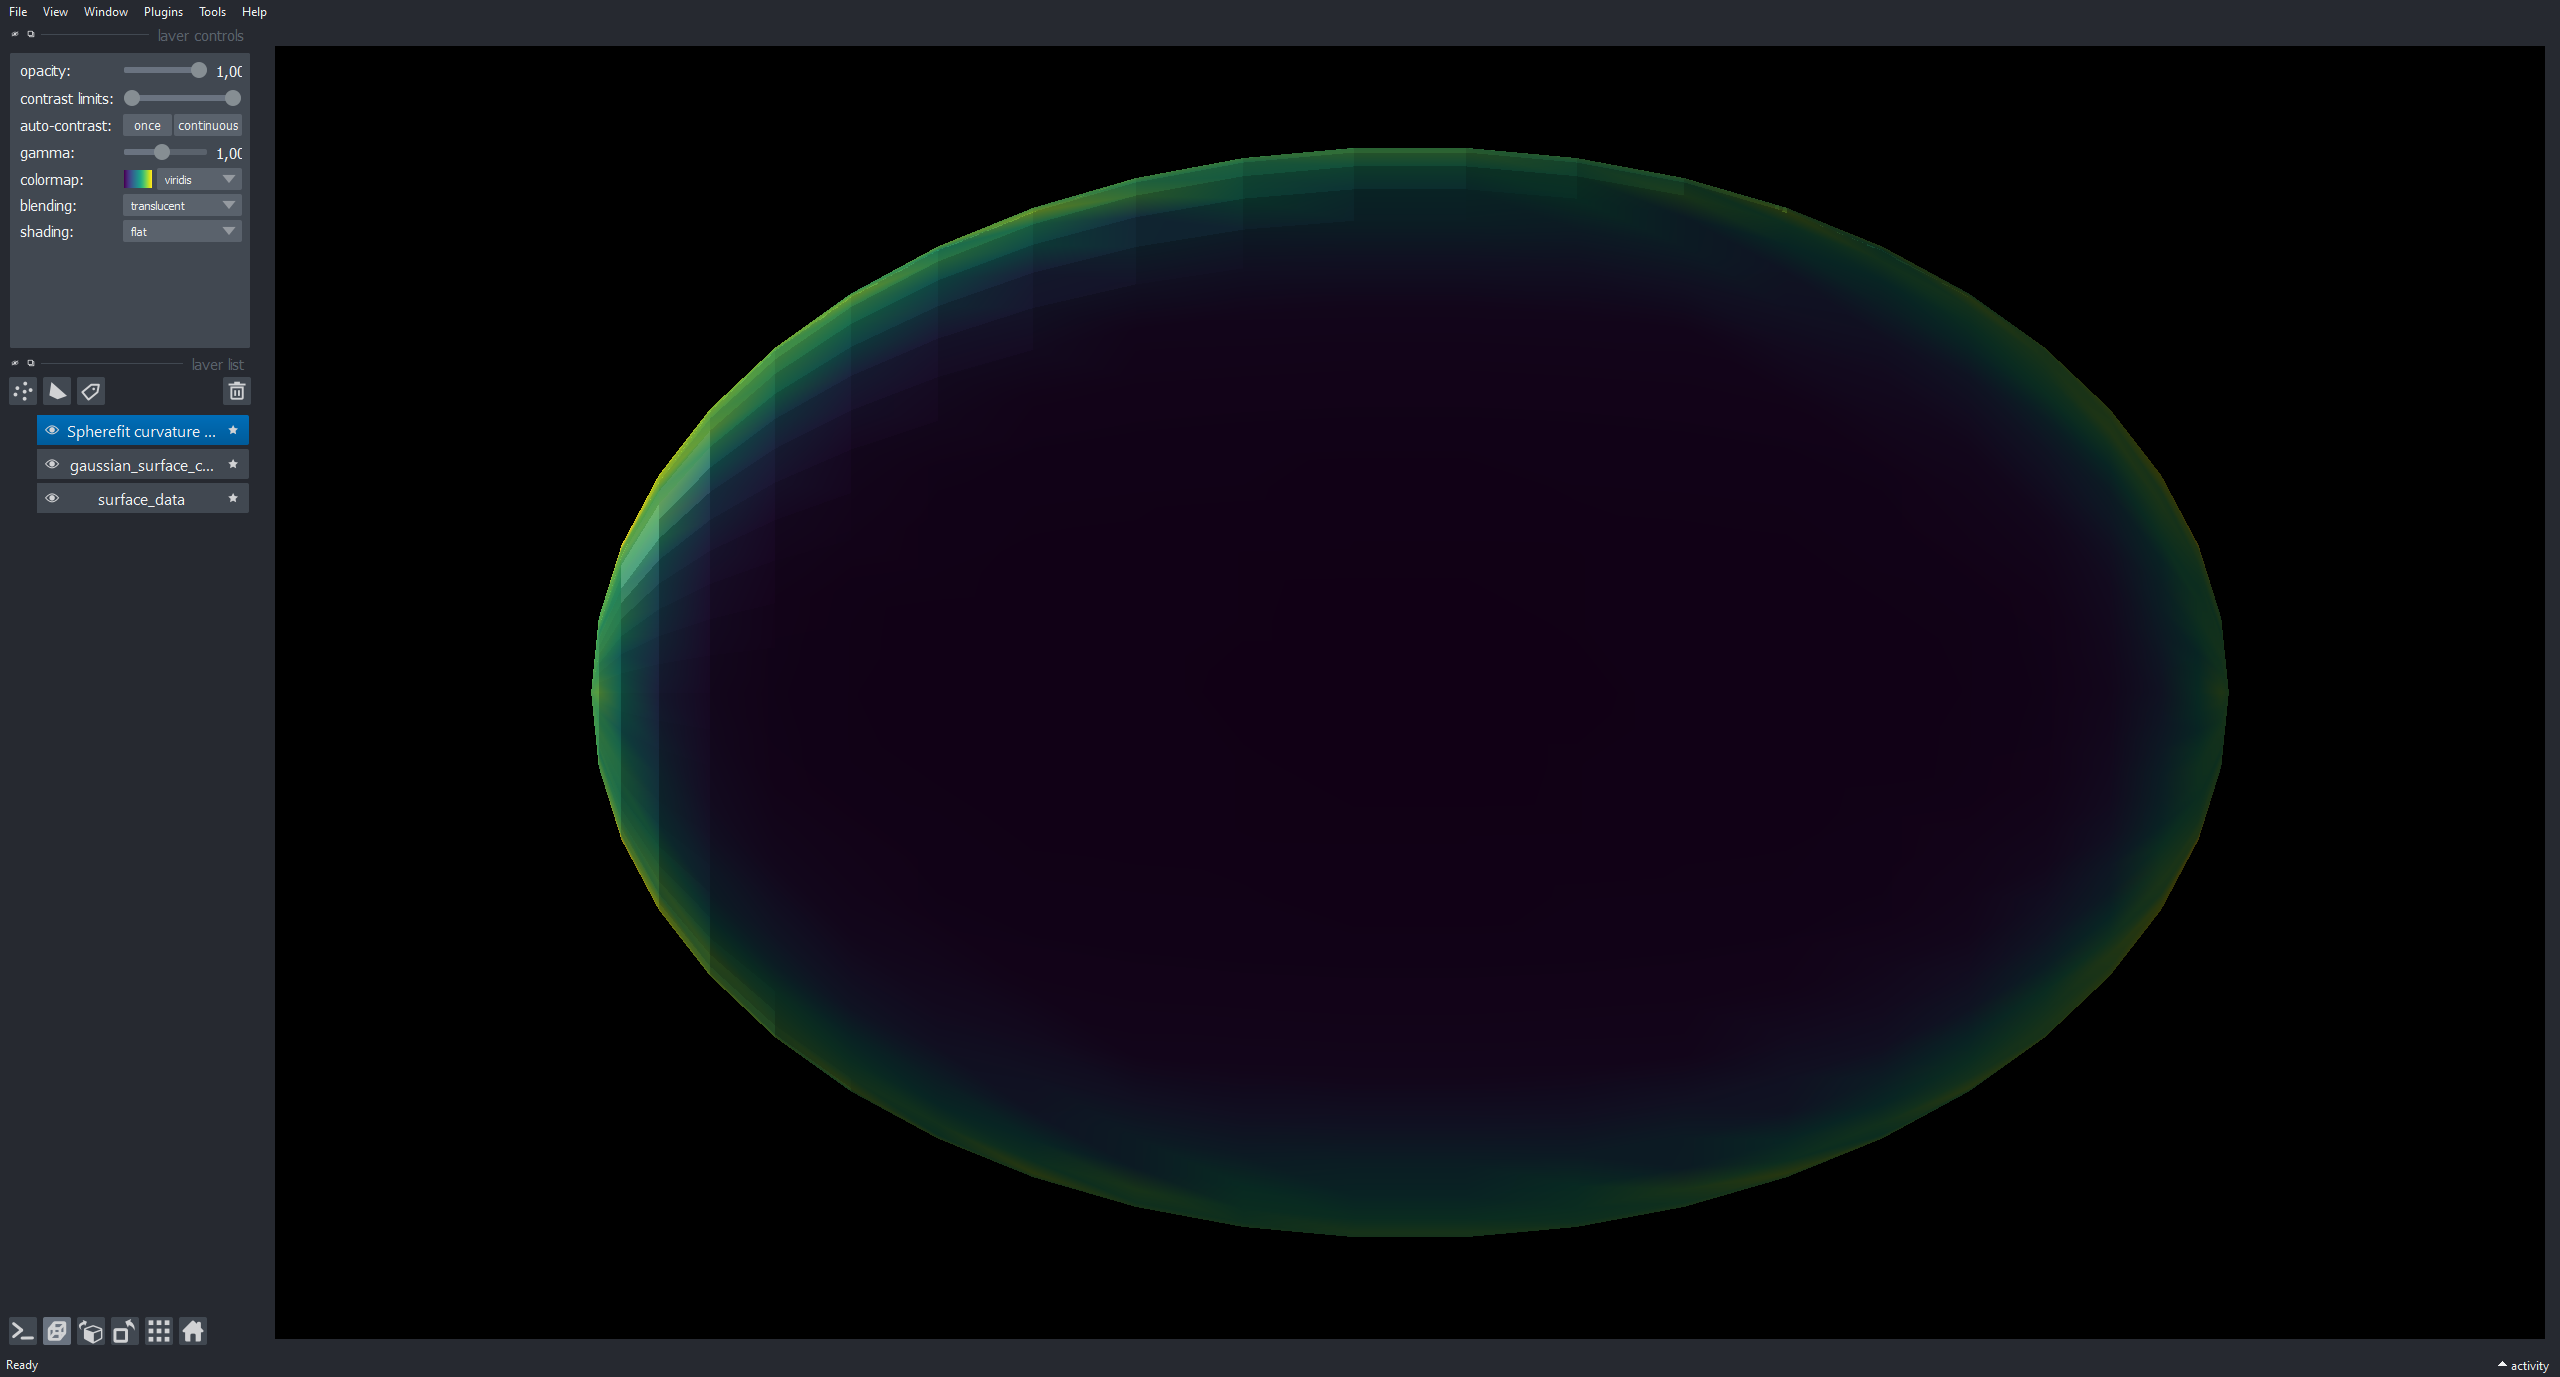

In [6]:
output1 = spherefitted_curvature(surface_layer.data, radius=0.25)
viewer.add_surface(output1[0][0], name='Spherefit curvature (r=1)', colormap='viridis')
napari.utils.nbscreenshot(viewer, canvas_only=False)

Note how the curvature and the fit residues change if the radius is changed:

In [7]:
output2 = spherefitted_curvature(surface_layer.data, radius=1)
output3 = spherefitted_curvature(surface_layer.data, radius=2.5)

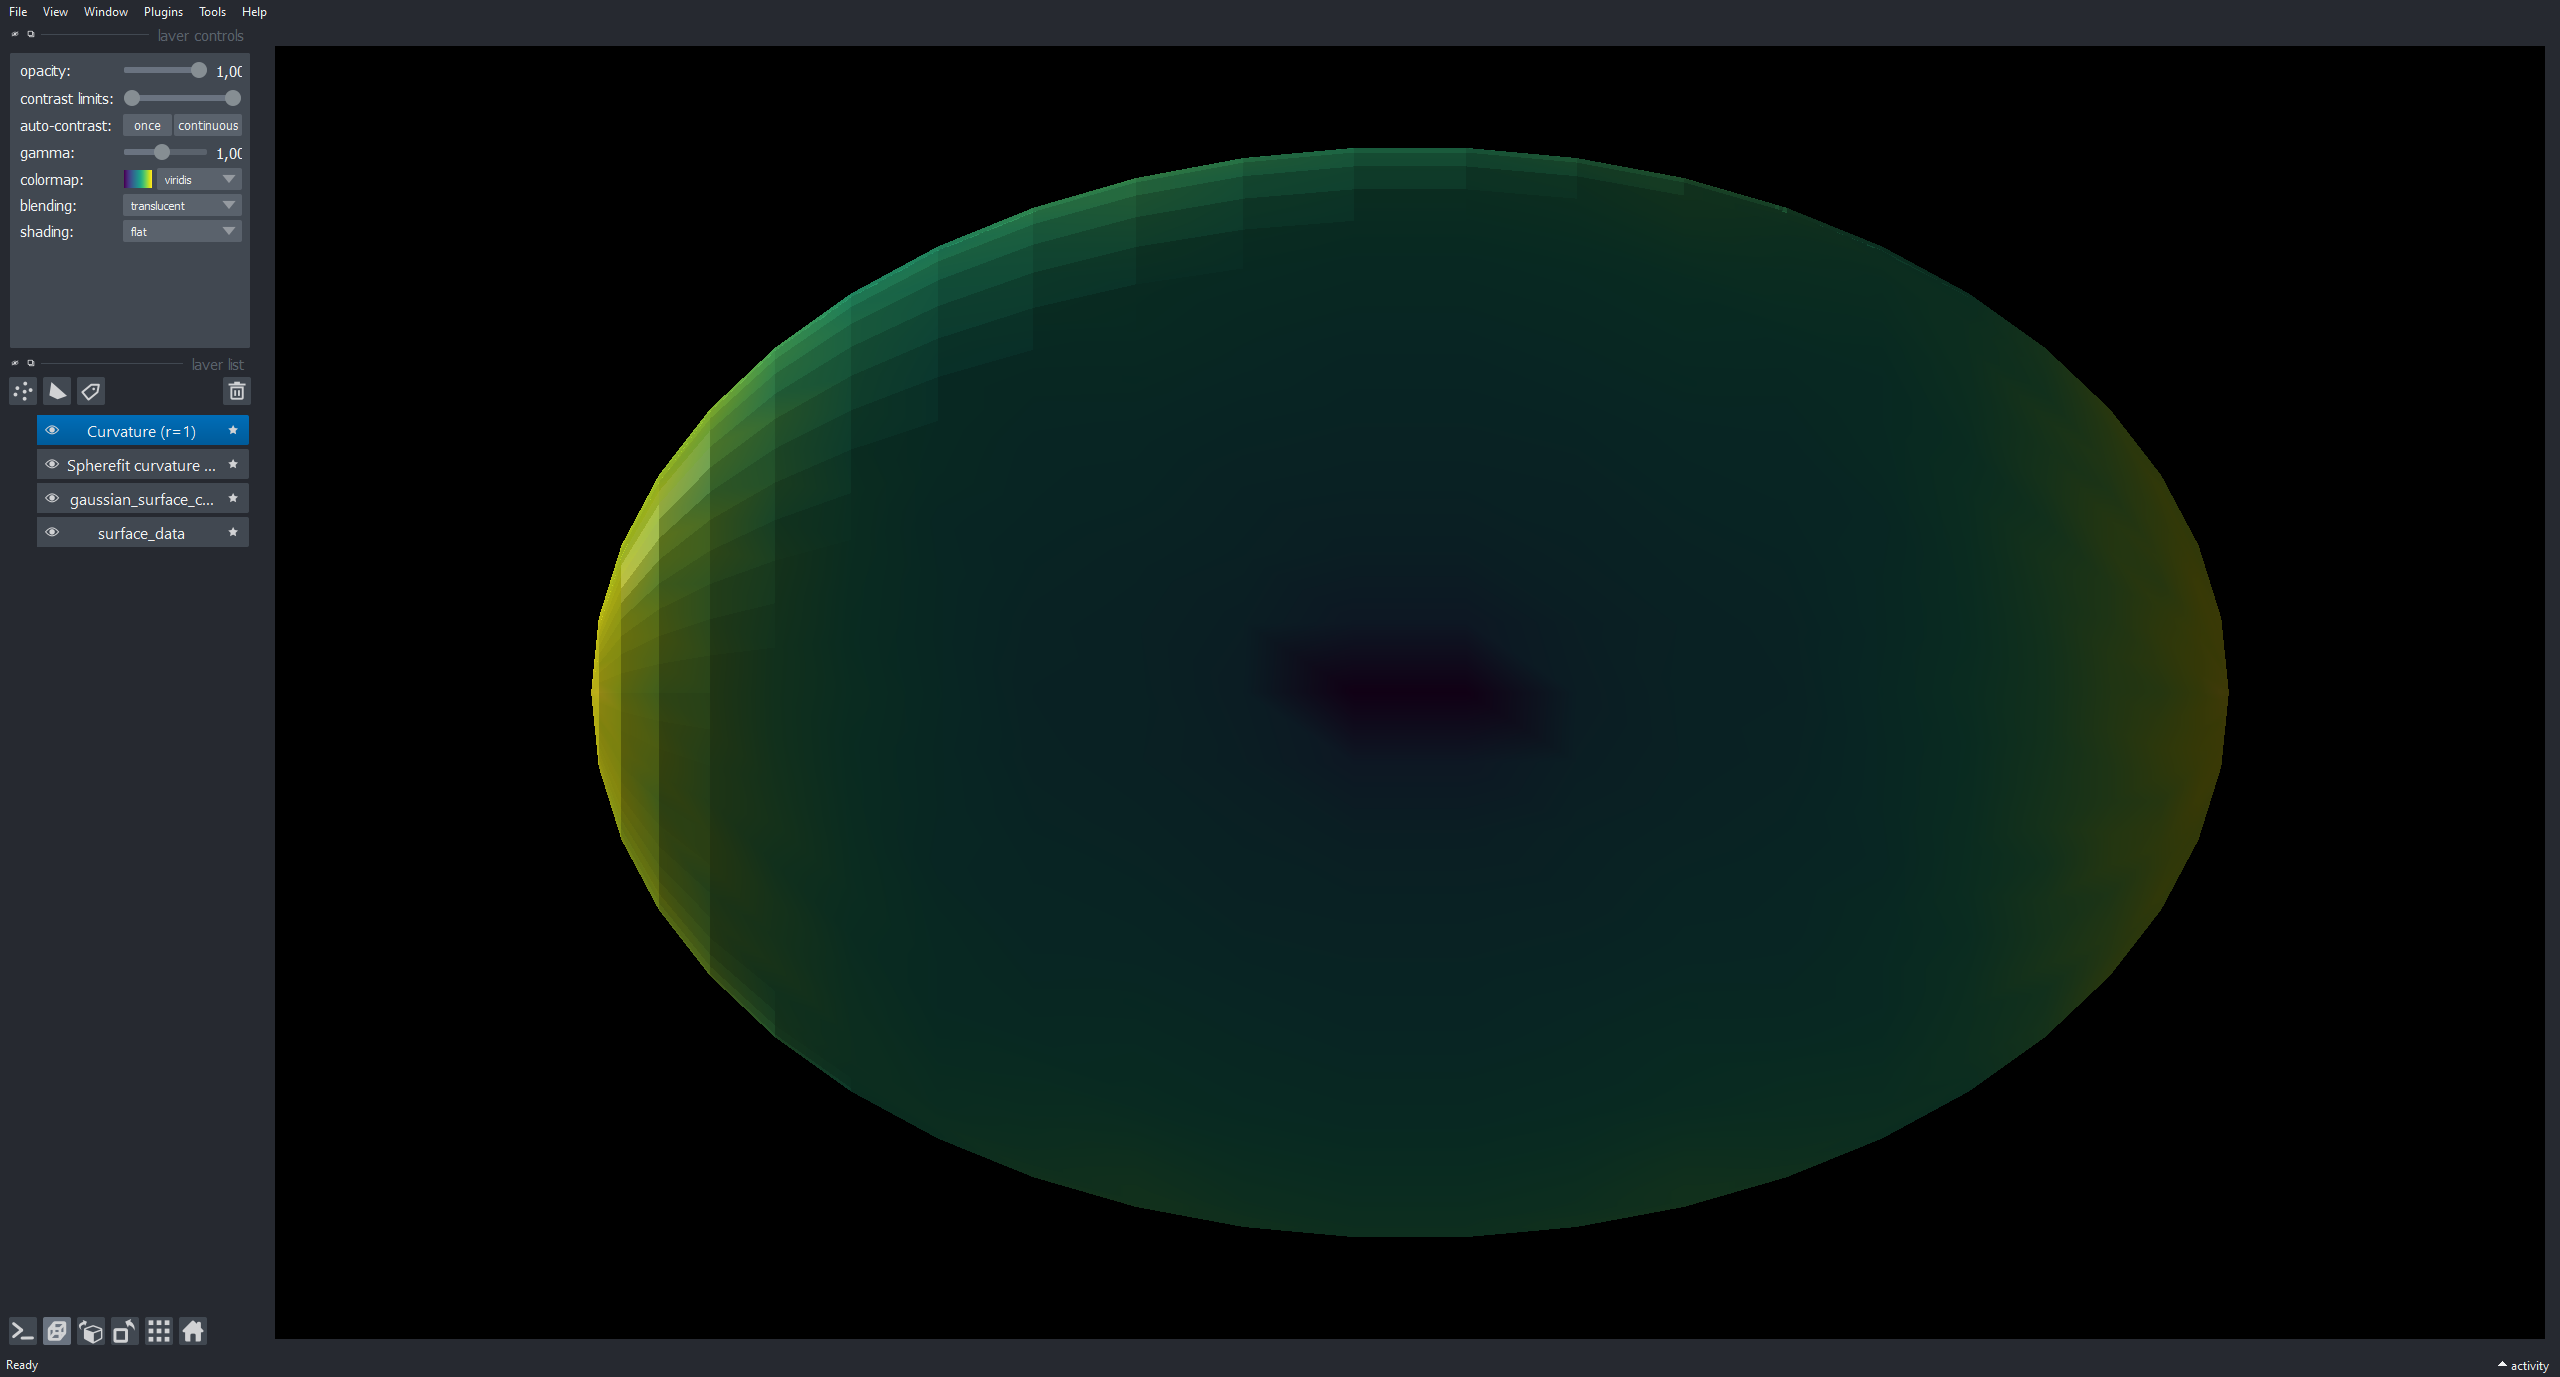

In [8]:
viewer.add_surface(output2[0][0], name='Curvature (r=1)', colormap='viridis')
napari.utils.nbscreenshot(viewer, canvas_only=False)

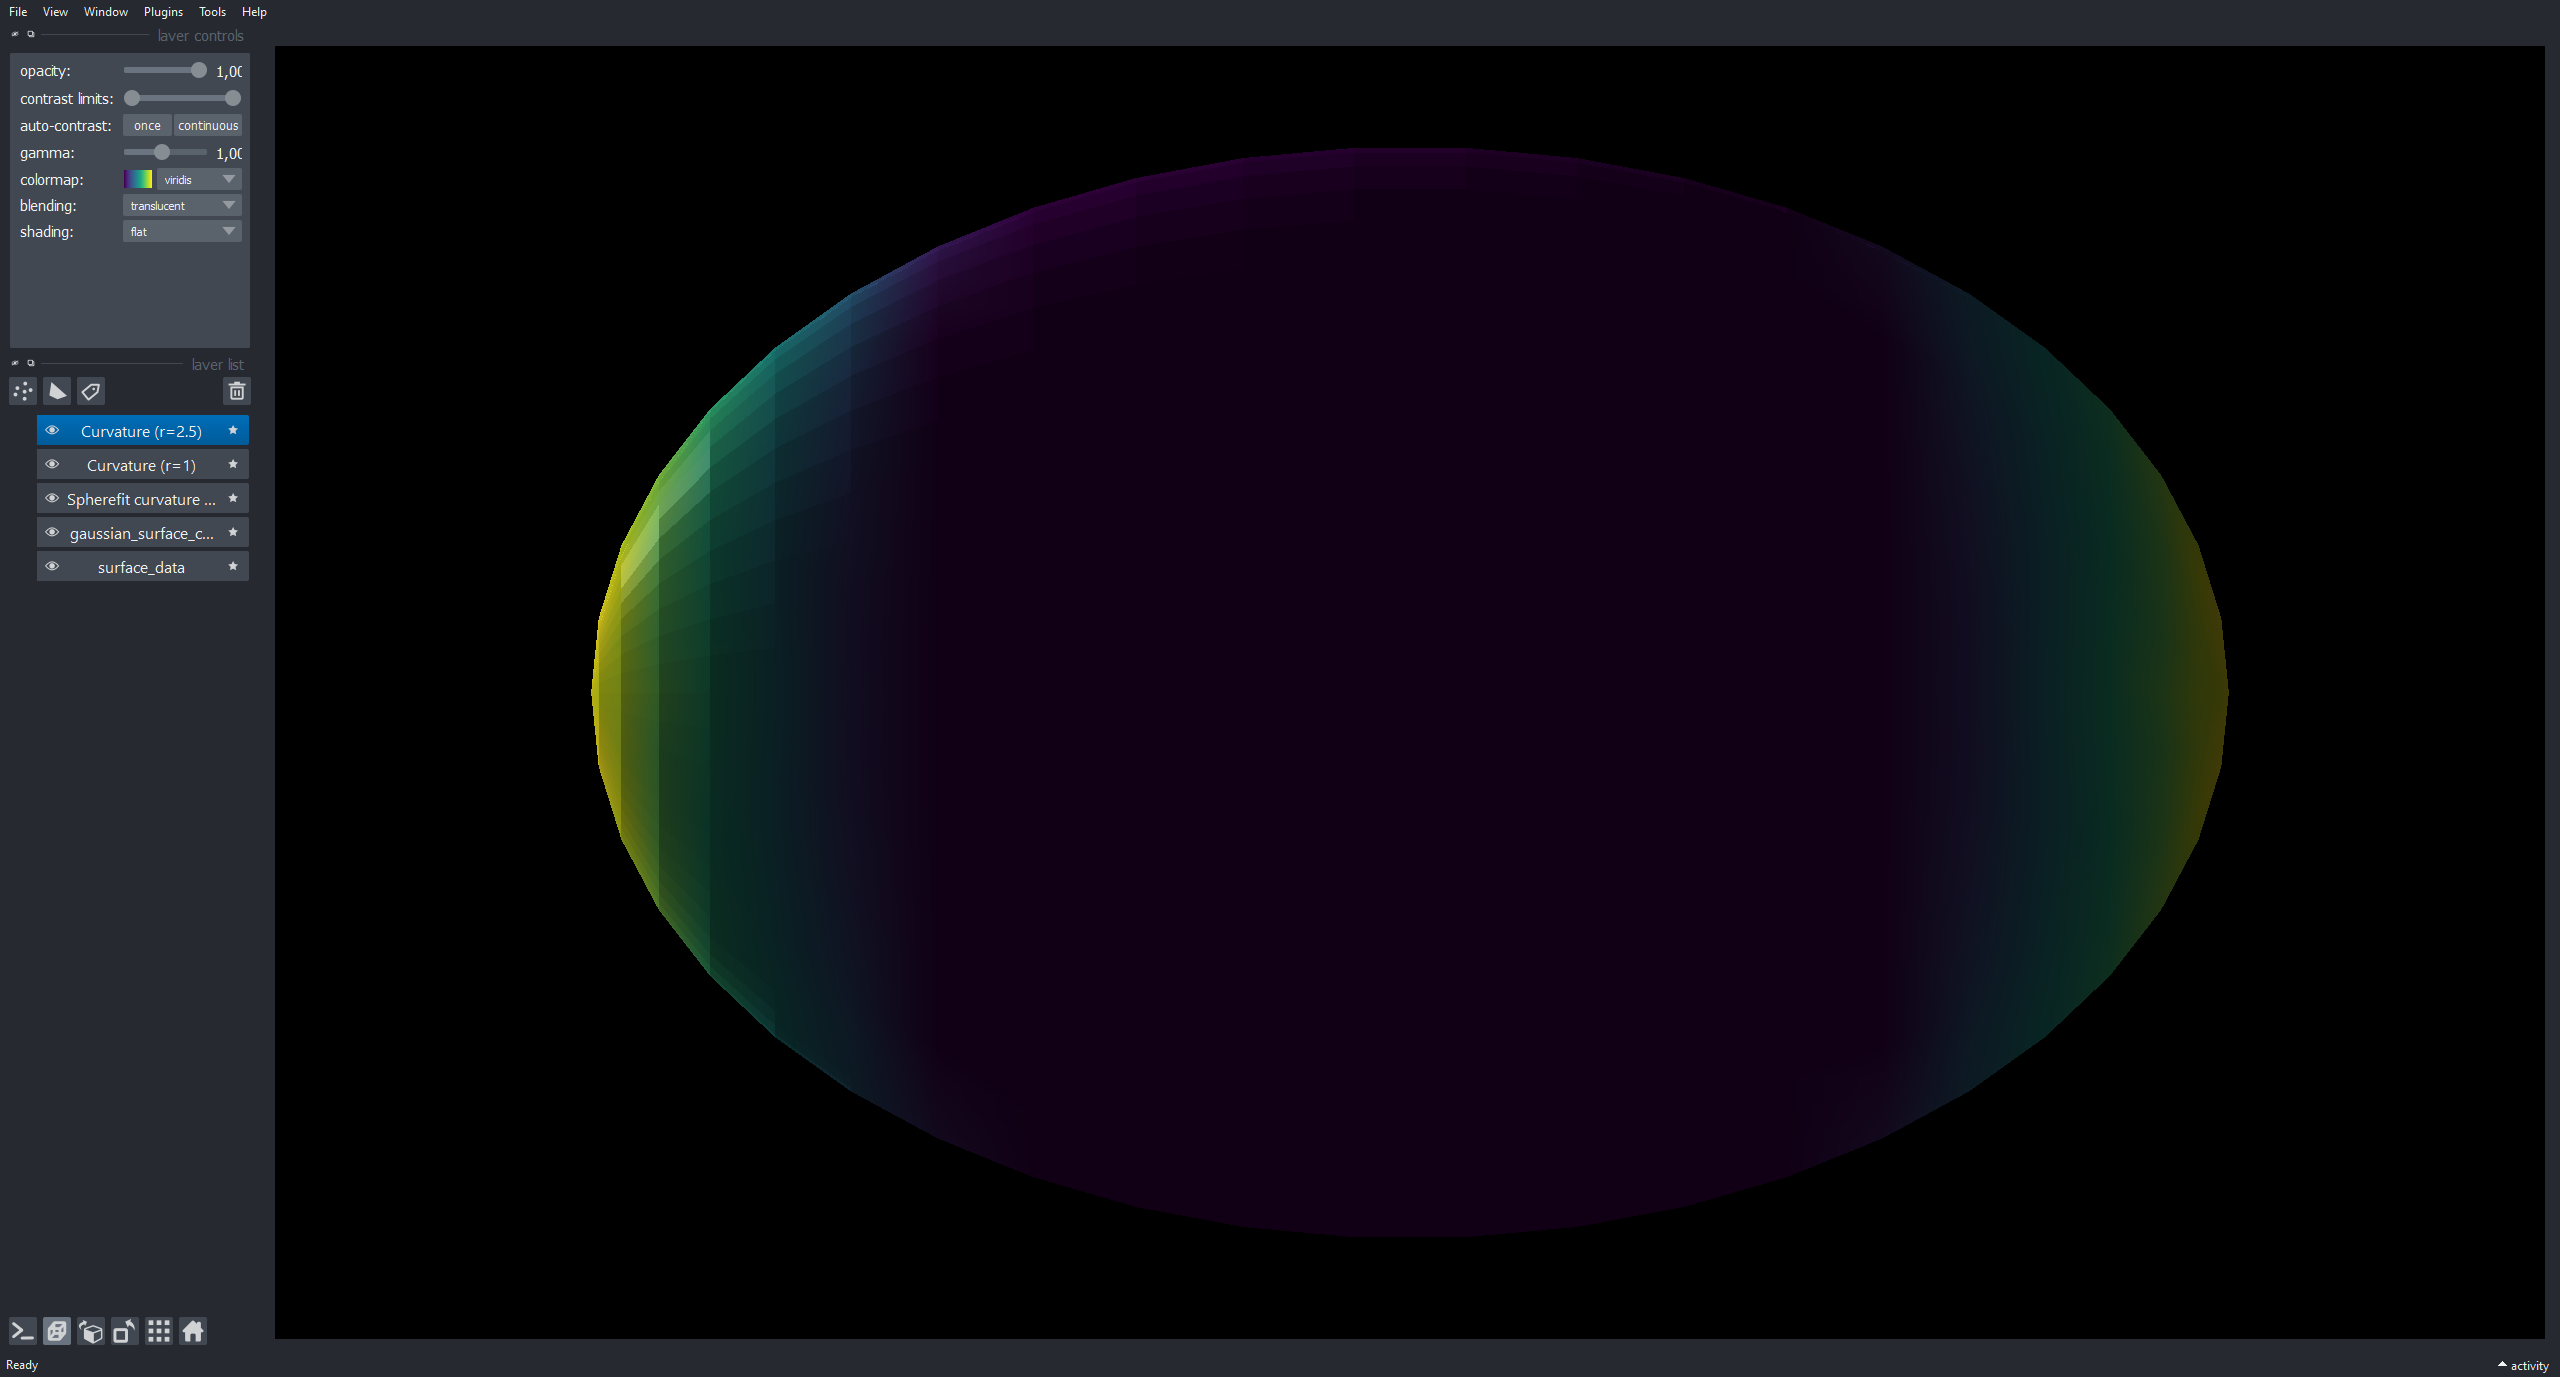

In [9]:
viewer.add_surface(output3[0][0], name='Curvature (r=2.5)', colormap='viridis')
napari.utils.nbscreenshot(viewer, canvas_only=False)

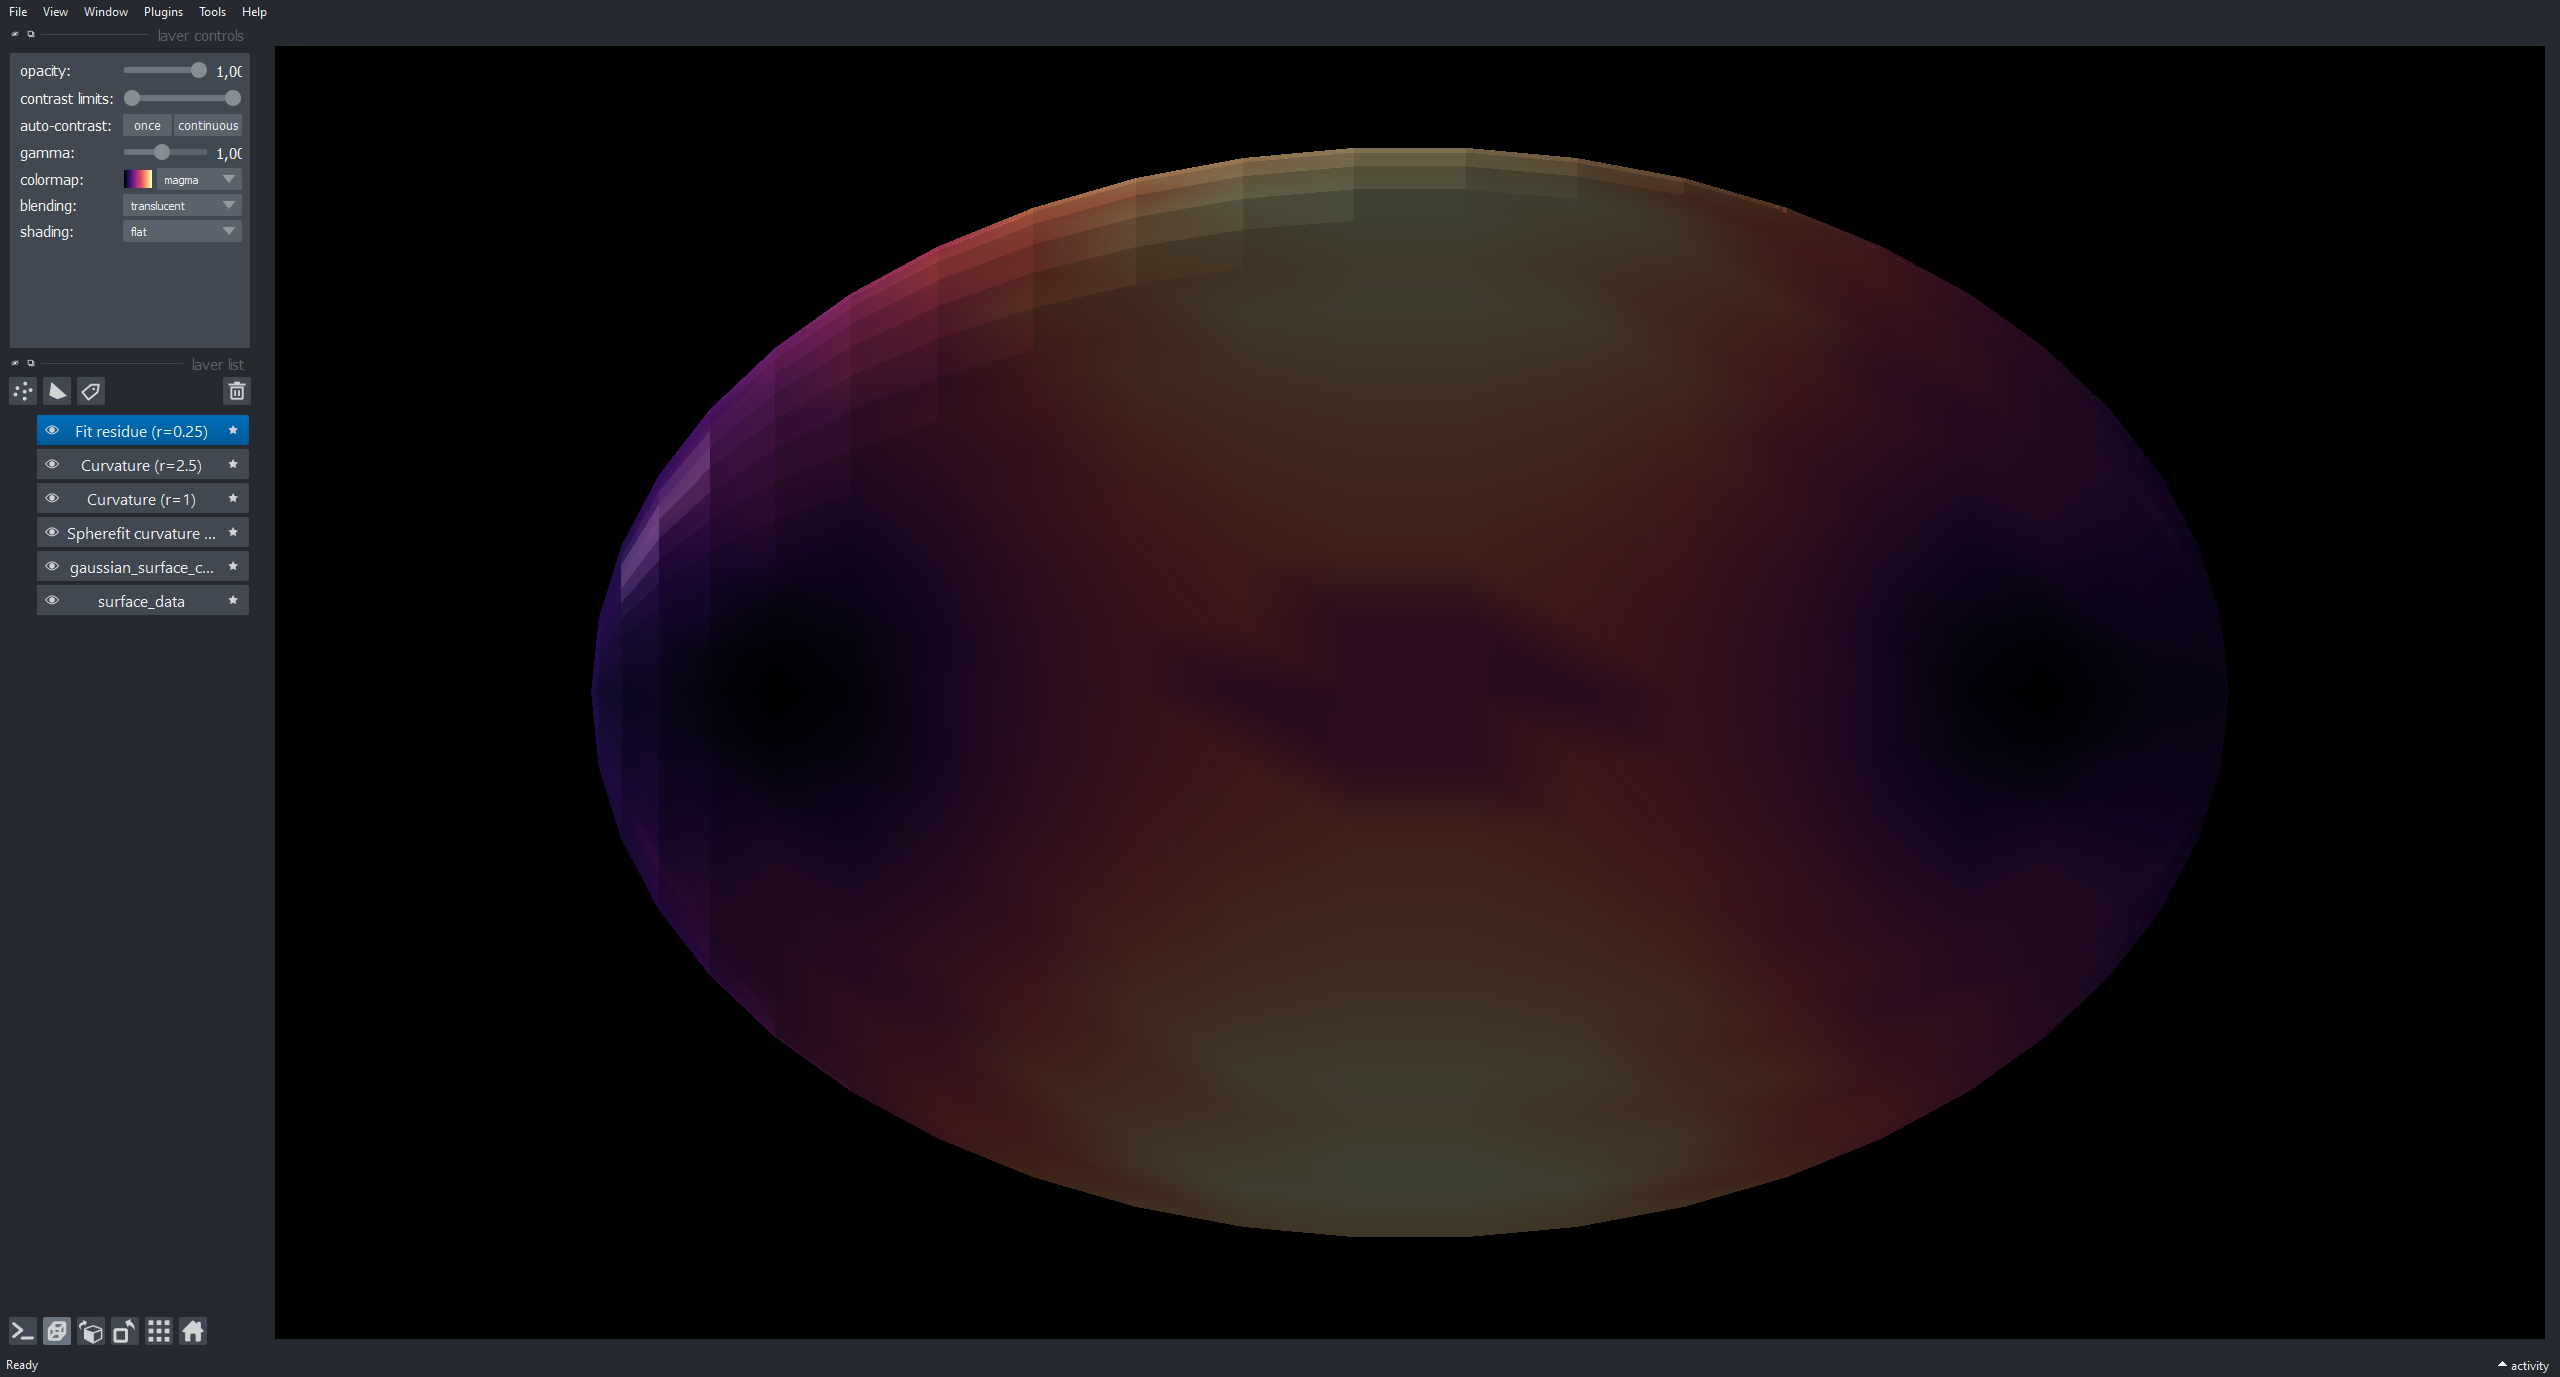

In [10]:
viewer.add_surface(output1[1][0], name='Fit residue (r=0.25)', colormap='magma')
napari.utils.nbscreenshot(viewer, canvas_only=False)

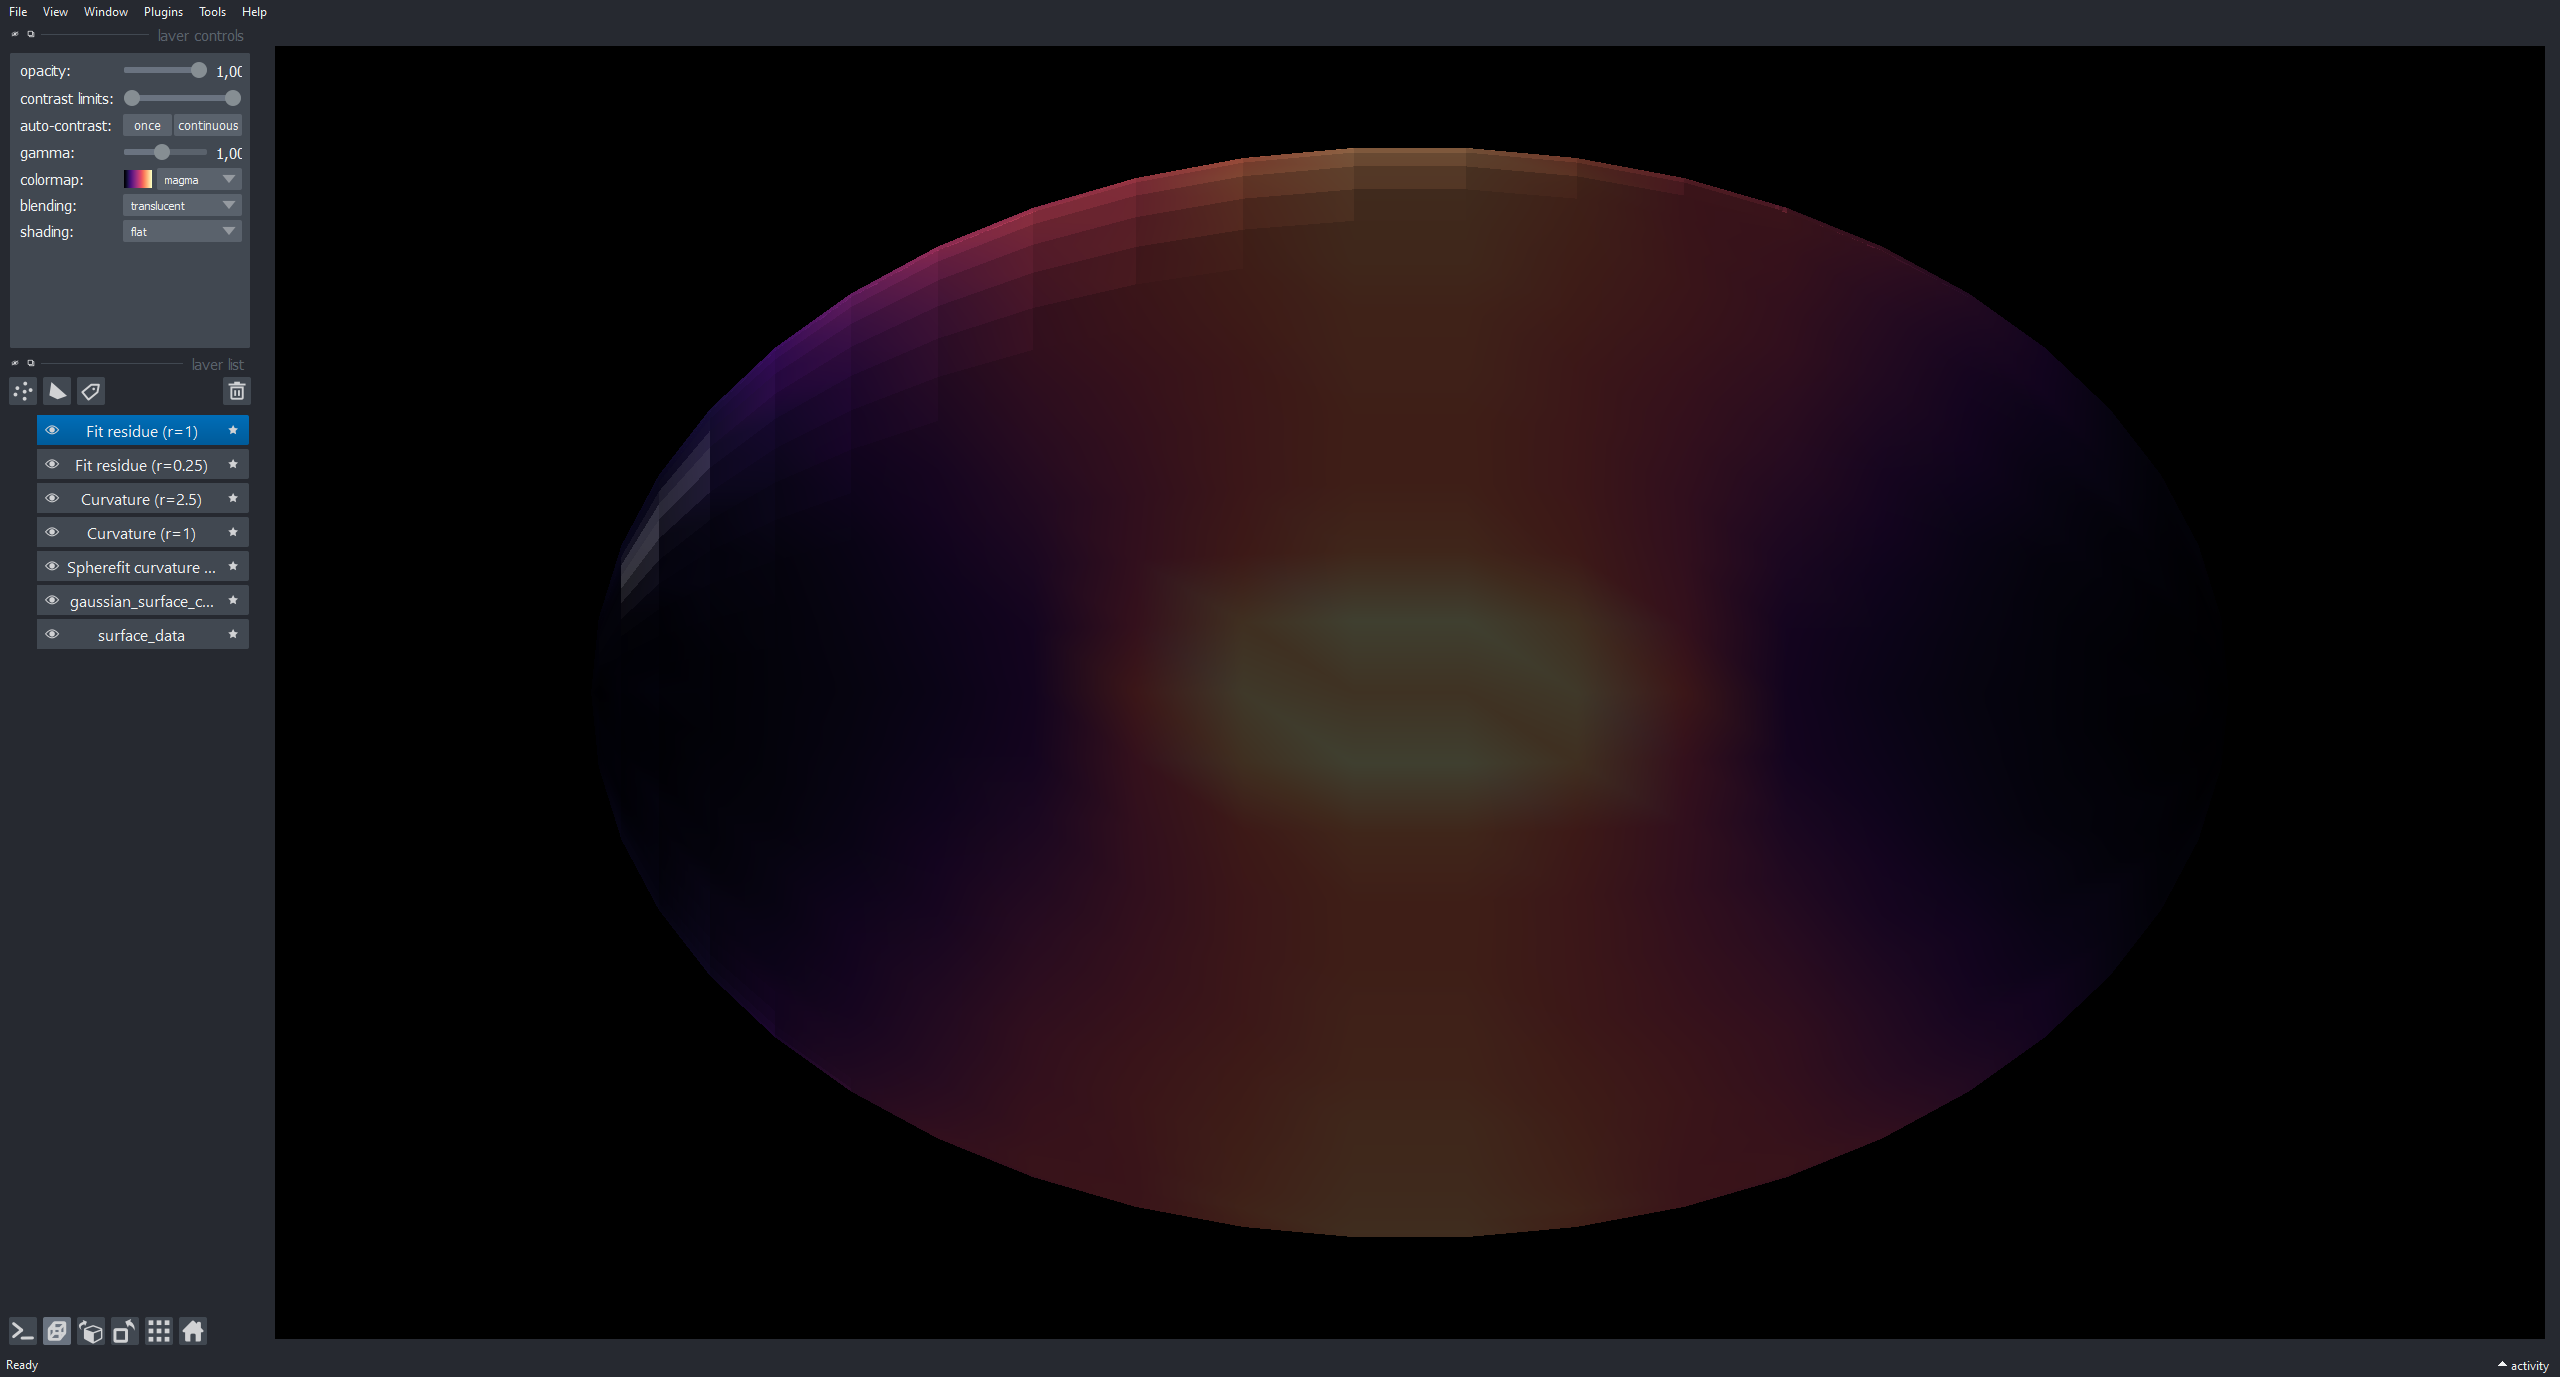

In [11]:
viewer.add_surface(output2[1][0], name='Fit residue (r=1)', colormap='magma')
napari.utils.nbscreenshot(viewer, canvas_only=False)

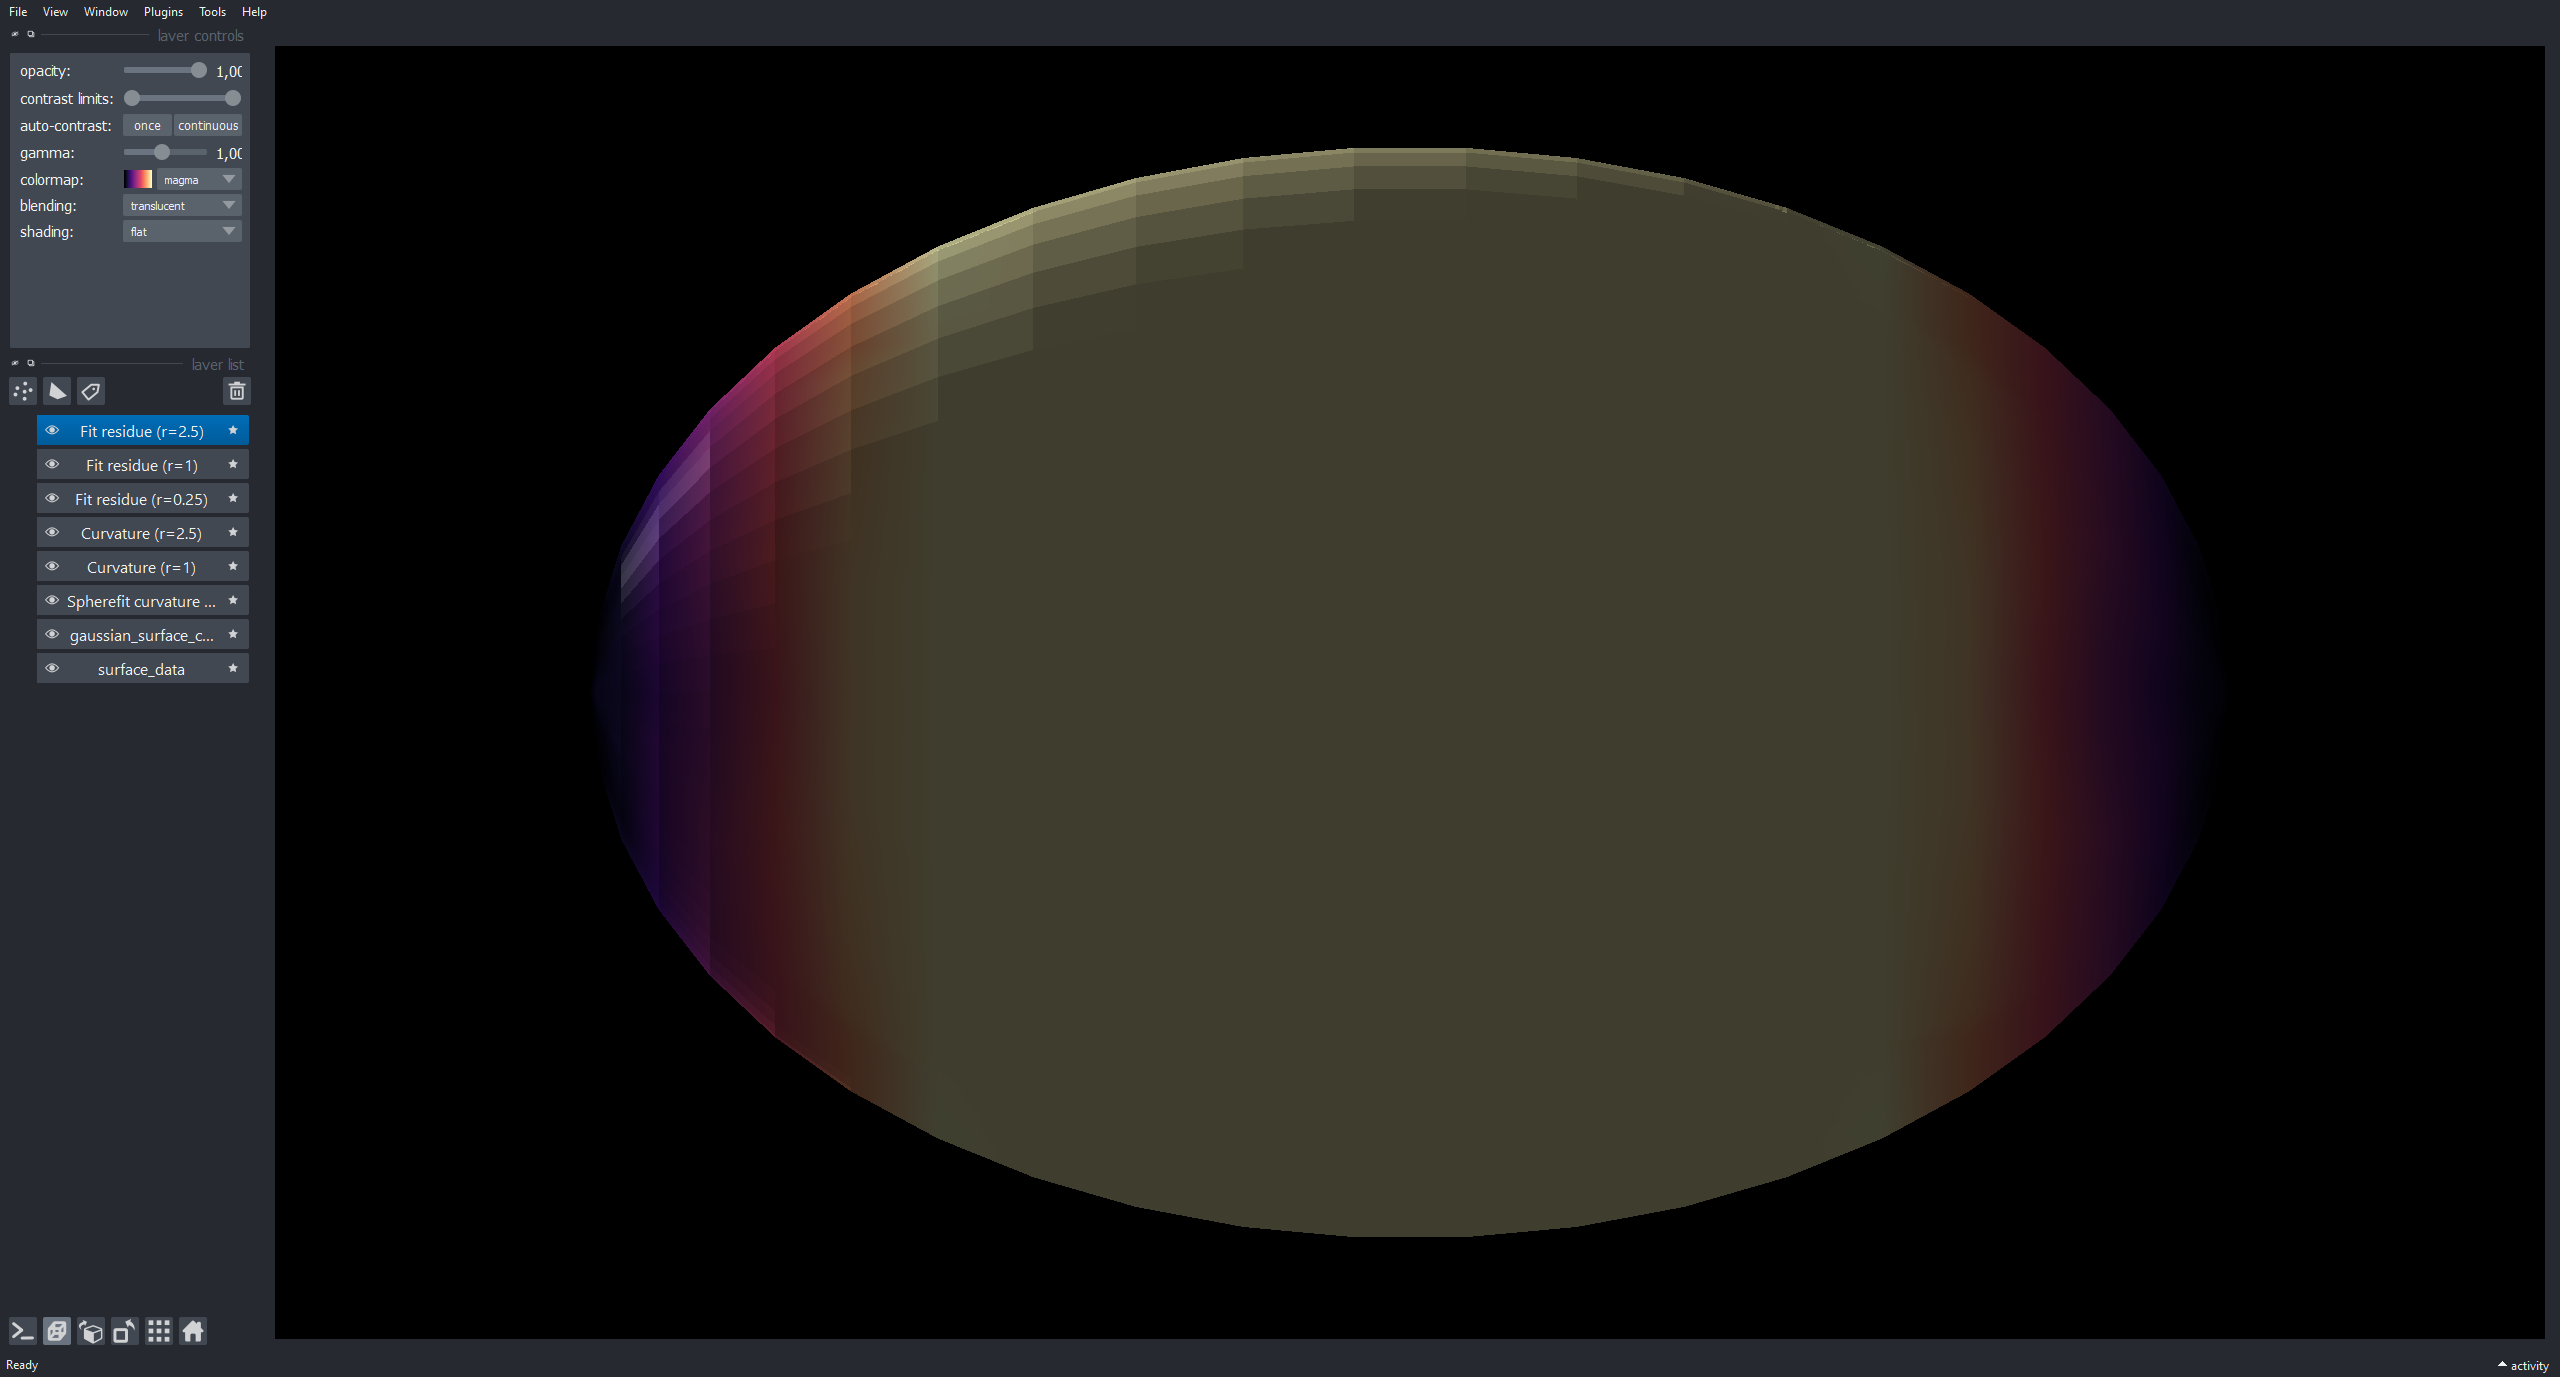

In [12]:
viewer.add_surface(output3[1][0], name='Fit residue (r=2.5)', colormap='magma')
napari.utils.nbscreenshot(viewer, canvas_only=False)